<a href="https://colab.research.google.com/github/partha1189/machine_learning/blob/tf_2.0_practice/NLP_LSTM_Subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P -O /tmp/sentiment.csv

--2020-09-14 14:43:18--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 74.125.195.113, 74.125.195.101, 74.125.195.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/925kucbmpm619tpoqsg85vbnn6sonkq7/1600094550000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-09-14 14:43:18--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/925kucbmpm619tpoqsg85vbnn6sonkq7/1600094550000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|74.125

In [3]:
dataset = pd.read_csv('/tmp/sentiment.csv')

In [4]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [5]:
# Print some example sentences and labels
for x in range(2):
  print(sentences[x])
  print(labels[x])
  print("\n")

So there is no way for me to plug it in here in the US unless I go by a converter.
0


Good case Excellent value.
1




In [6]:
import tensorflow_datasets as tfds

In [7]:
vocab_size = 1000
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

print("Vocab size is ", tokenizer.vocab_size)

Vocab size is  999


In [8]:
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [9]:
for i in encoded:
  print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


Replace Sentence Data with encoded Subwords

In [10]:
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [11]:
print(sentences[5])

[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


Final Preprocessing

In [12]:
import numpy as np

max_length = 50
trunc_type = 'post'
padding_type = 'post'

sequence_padded = pad_sequences(sentences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

training_size = int(len(sentences) * 0.8)

training_sentences = sequence_padded[:training_size]
training_labels = labels[:training_size]
testing_sequences = sequence_padded[training_size:]
testing_labels = labels[training_size:]

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

Model using Embedding

In [13]:
embedding_dim = 16

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')                                 
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 30
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_sentences, training_labels_final, epochs=num_epochs, validation_data=(testing_sequences, testing_labels_final))


Epoch 1/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5154 - val_loss: 0.6990 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5223 - val_loss: 0.7050 - val_accuracy: 0.4110
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5392 - val_loss: 0.6932 - val_accuracy: 0.4812
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.5832 - val_loss: 0.6866 - val_accuracy: 0.5013
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.6491 - val_loss: 0.6772 - val_accuracy: 0.5113
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6276 - accuracy: 0.6717 - val_loss: 0.6448 - val_accuracy: 0.7068
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 0.7690 - val_loss: 0.6368 - val_accuracy: 0.6291
Epoch 8/30
50/50 [==

Plot Accuracy & Loss

In [15]:
import matplotlib.pyplot as plt

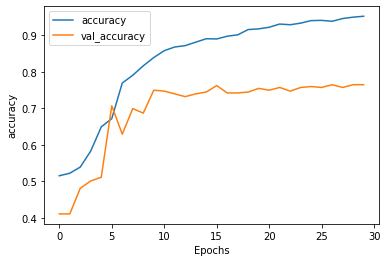

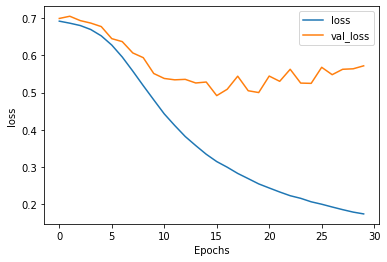

In [16]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [17]:
def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequence=True ):
  new_sequences = []

  for i, frvw in enumerate(new_sentences):
    new_sequences.append(tokenizer.encode(frvw))

  trunc_type = 'post'
  padding_type = 'post'

  new_reviews_padded = pad_sequences(new_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

  classes = model.predict(new_reviews_padded)

  for x in range(len(new_sentences)):
    if(show_padded_sequence):
      print(new_reviews_padded[x])
    
    print(new_sentences[x])

    print(classes[x])
    print('\n')

In [18]:
fake_reviews = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]

predict_review(model, fake_reviews)

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.91292566]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.09969194]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.30308688]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.09221524]


[  1 109 228 540 237 635 2

In [21]:
def fit_model_now (model, sentences) :
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  history = model.fit(training_sentences, training_labels_final, epochs=num_epochs, 
                      validation_data=(testing_sequences, testing_labels_final))
  return history

def plot_results (history):
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")

def fit_model_and_show_results (model, sentences):
  history = fit_model_now(model, sentences)
  plot_results(history)
  predict_review(model, sentences)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 1s 20ms/step - loss: 0.6921 - accuracy: 0.5223 - val_loss: 0.6981 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 8ms/step - loss: 0.6737 - accuracy: 0.5242 - val_los

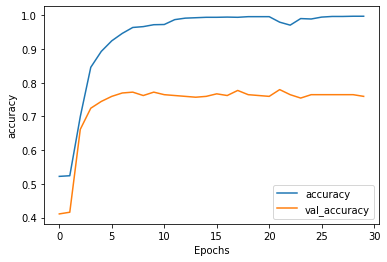

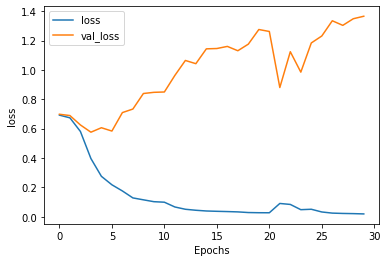

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9981515]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.02964093]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.6666087]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.01689975]


[  1 109 228 540 237 635 241

In [23]:
# Define the model
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)), 
    tf.keras.layers.Dense(6, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model and then show the predictions for our extra sentences
fit_model_and_show_results(model_bidi_lstm, fake_reviews)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 26,701
Trainable params: 26,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 2s 34ms/step - loss: 0.6913 - accuracy: 0.5336 - val_loss: 0.692

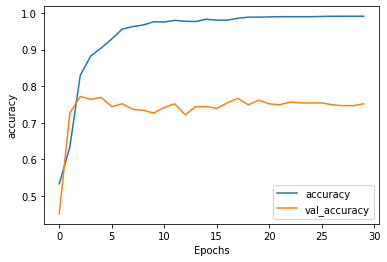

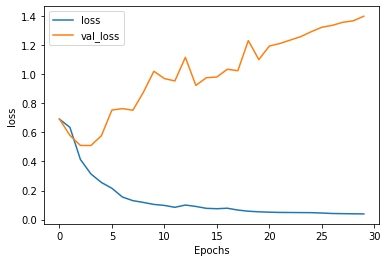

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.99983776]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.01361502]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.0111205]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.01382927]


[  1 109 228 540 237 635 24

In [24]:
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
                                                       return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

fit_model_and_show_results(model_multiple_bidi_lstm, fake_reviews)

In [25]:
my_reviews =["lovely", "dreadful", "stay away",
             "everything was hot exactly as I wanted",
             "everything was not exactly as I wanted",
             "they gave us free chocolate cake",
             "I've never eaten anything so spicy in my life, my throat burned for hours",
             "for a phone that is as expensive as this one I expect it to be much easier to use than this thing is",
             "we left there very full for a low price so I'd say you just can't go wrong at this place",
             "that place does not have quality meals and it isn't a good place to go for dinner",
             ]

In [26]:
print("===================================\n","Embeddings only:\n", "===================================",)
predict_review(model, my_reviews, show_padded_sequence=False)

 Embeddings only:
lovely
[0.91780776]


dreadful
[0.28161028]


stay away
[0.6425401]


everything was hot exactly as I wanted
[0.7495806]


everything was not exactly as I wanted
[0.4378547]


they gave us free chocolate cake
[0.7415764]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.05180862]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.36083278]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.6877872]


that place does not have quality meals and it isn't a good place to go for dinner
[0.8193258]




In [27]:
print("===================================\n", "With a single bidirectional LSTM:\n", "===================================")
predict_review(model_bidi_lstm, my_reviews, show_padded_sequence=False)

 With a single bidirectional LSTM:
lovely
[0.9948631]


dreadful
[0.0063751]


stay away
[0.01234316]


everything was hot exactly as I wanted
[0.9670758]


everything was not exactly as I wanted
[0.04774205]


they gave us free chocolate cake
[0.9955381]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.07942035]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.00520774]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.99997914]


that place does not have quality meals and it isn't a good place to go for dinner
[0.87424016]




In [28]:
print("===================================\n","With two bidirectional LSTMs:\n", "===================================")
predict_review(model_multiple_bidi_lstm, my_reviews, show_padded_sequence=False)

 With two bidirectional LSTMs:
lovely
[0.9998247]


dreadful
[0.01155635]


stay away
[0.01208186]


everything was hot exactly as I wanted
[0.16023351]


everything was not exactly as I wanted
[0.01093149]


they gave us free chocolate cake
[0.99982697]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.00976201]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.01030274]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.01118811]


that place does not have quality meals and it isn't a good place to go for dinner
[0.01158466]


